# ***Crop Guard - Deep Learning Model Using CNN and ResNet50***

*Necessary Libraries*

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.preprocessing.image import ImageDataGenerator
import logging
logging.getLogger('tensorflow').setLevel(logging.DEBUG)
import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO
import cv2




# tensorflow
import tensorflow.keras as keras
import tensorflow as tf

# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from google.colab import drive

*Access Google Drive for Dataset*

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


*Load Trained model from Google drive*

In [ ]:
# Load the saved model from Google Drive
model = load_model('/content/drive/MyDrive/model/new_paddy_model.h5')

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_4 (Flatten)         (None, 100352)            0         
                                                                 
 dense_8 (Dense)             (None, 128)               12845184  
                                                                 
 dense_9 (Dense)             (None, 4)                 516       
                                                                 
Total params: 36433412 (138.98 MB)
Trainable params: 12845700 (49.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


*Image Preprocessing using Keras*

In [ ]:
# Define base directory
base_dir = "/content/drive/MyDrive/main-6k-rice-70-10-20"

# Define train, test, and valid directories
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")
valid_dir = os.path.join(base_dir, "valid")


# Image Preprocessing
train_generator = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(directory=train_dir,target_size=(224,224),classes=['blast','blight','spot','tungro'],batch_size=10)

valid_generator = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(directory=valid_dir,target_size=(224,224),classes=['blast','blight','spot','tungro'],batch_size=10)

test_generator = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(directory=test_dir,target_size=(224,224),classes=['blast','blight','spot','tungro'],batch_size=10)

Found 4407 images belonging to 4 classes.
Found 624 images belonging to 4 classes.
Found 1253 images belonging to 4 classes.


**Train Model**

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam




# Load the pre-trained ResNet50 model (excluding the top layer)
resnet50_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base model
for layer in resnet50_base.layers:
    layer.trainable = False

# Create a new model on top of the ResNet50 base

model = Sequential([
    resnet50_base,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])


# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=valid_generator,
    validation_steps=len(valid_generator)
)

Epoch 1/10
441/441 [==============================] - 491s 1s/step - loss: 1.3949 - accuracy: 0.9160 - val_loss: 0.1641 - val_accuracy: 0.9792
Epoch 2/10
441/441 [==============================] - 38s 85ms/step - loss: 0.0584 - accuracy: 0.9914 - val_loss: 0.2214 - val_accuracy: 0.9615
Epoch 3/10
441/441 [==============================] - 38s 85ms/step - loss: 0.0633 - accuracy: 0.9925 - val_loss: 0.2428 - val_accuracy: 0.9760
Epoch 4/10
441/441 [==============================] - 38s 85ms/step - loss: 0.1423 - accuracy: 0.9841 - val_loss: 0.5865 - val_accuracy: 0.9439
Epoch 5/10
441/441 [==============================] - 38s 87ms/step - loss: 0.1144 - accuracy: 0.9871 - val_loss: 0.5722 - val_accuracy: 0.9551
Epoch 6/10
441/441 [==============================] - 38s 85ms/step - loss: 0.0478 - accuracy: 0.9925 - val_loss: 0.2007 - val_accuracy: 0.9888
Epoch 7/10
441/441 [==============================] - 37s 85ms/step - loss: 0.0651 - accuracy: 0.9948 - val_loss: 0.0683 - val_accuracy: 

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print()
print(f'Test accuracy: {test_accuracy*100}')
print(f'Test loss: {test_loss}')

126/126 [==============================] - 225s 2s/step - loss: 0.4575 - accuracy: 0.9705
Test accuracy: 97.04708456993103
Test loss: 0.4574723243713379


Test Image using Link


In [ ]:
# Unseen Image
# Blast  : https://www.nppc.gov.bt/wp-content/uploads/2023/08/rice-blast-leaf-lesions-lsu.jpg
# Blight : https://www.drishtiias.com/images/uploads/1601885203_image2.jpg
# Tungro : https://agritech.tnau.ac.in/crop_protection/images/rice_diseases/tungro_1.jpg
# Spot   : https://ccari.icar.gov.in/dss/images/rice/rice%20brown%20spot%20(1).jpg

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_class(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    predictions = model.predict(img_array)
    predicted_class_indices = np.argmax(predictions, axis=1)
    class_labels = train_generator.class_indices
    class_labels = dict((v, k) for k, v in class_labels.items())
    predicted_class = class_labels[predicted_class_indices[0]]
    print("Predicted class:", predicted_class)

# Test predictions
img_paths = [
    '/content/drive/MyDrive/model/test-blight.jpg',
    '/content/drive/MyDrive/model/test-blast.jpg',
    '/content/drive/MyDrive/model/test-tungro2.jpg',
    '/content/drive/MyDrive/model/test-spot.jpg'
]

for path in img_paths:
    print("Image Path:", path)
    predict_class(path)
    print() #for new line
    print()


Image Path: /content/drive/MyDrive/model/test-blight.jpg
1/1 [==============================] - 0s 307ms/step
Predicted class: blight


Image Path: /content/drive/MyDrive/model/test-blast.jpg
1/1 [==============================] - 0s 323ms/step
Predicted class: blast


Image Path: /content/drive/MyDrive/model/test-tungro2.jpg
1/1 [==============================] - 0s 348ms/step
Predicted class: tungro


Image Path: /content/drive/MyDrive/model/test-spot.jpg
1/1 [==============================] - 0s 214ms/step
Predicted class: spot




*Save Model to Google Drive*

In [ ]:
# Save the model to Google Drive
model.save('/content/drive/MyDrive/model/new_paddy_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


*Convert .h5 model to .tflite model*

In [ ]:
# Path to the input h5 model file
h5_model_path = '/content/drive/MyDrive/model/new_paddy_model.h5'

# Path to save the output TFLite model file
tflite_model_path = '/content/drive/MyDrive/model/paddy_model_tflite.tflite'

# Load the h5 model
model = tf.keras.models.load_model(h5_model_path)

# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to file
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

print("TFLite model conversion completed successfully!")

INFO:tensorflow:Assets written to: /tmp/tmp4neba1x6/assets


TFLite model conversion completed successfully!


In [ ]:
# Use this block to predict local files
img_path = '/content/drive/MyDrive/model/test-blight.jpg'  # image path goes here

def predict_class(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    predictions = model.predict(img_array)
    predicted_class_indices = np.argmax(predictions, axis=1)
    class_labels = train_generator.class_indices
    class_labels = dict((v, k) for k, v in class_labels.items())
    predicted_class = class_labels[predicted_class_indices[0]]
    print("Predicted class:", predicted_class)

# Predict the class
predict_class(img_path)

1/1 [==============================] - 0s 23ms/step
Predicted class: blight


Enter the URL of the image: https://ccari.icar.gov.in/dss/images/rice/rice%20brown%20spot%20(1).jpg
1/1 [==============================] - 0s 49ms/step


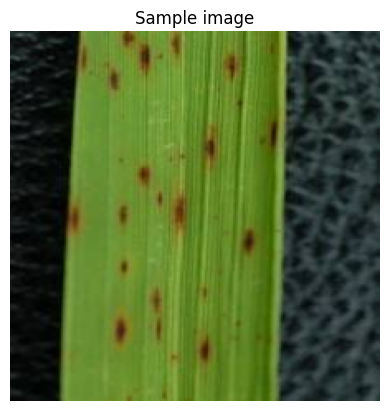


Predicted disease: spot


In [ ]:
# Use this block to predict online direct links

# Function to load image from URL
def load_image_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img

# Dictionary to map class indices to disease names
class_to_disease = {
    0: 'blast',
    1: 'blight',
    2: 'spot',
    3: 'tungro'
}

# Accept image URL from the user
image_url = input("Enter the URL of the image: ")

# Load and preprocess the image
img = load_image_from_url(image_url)
img = img.resize((224, 224))  # Resize to match ResNet50 input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make predictions
predictions = model.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Get the predicted disease name using the class index
predicted_disease = class_to_disease.get(predicted_class_index, 'Unknown')

# Plot the image
plt.imshow(img)
plt.axis('off')
plt.title('Sample image')
plt.show()
print()
# Print the predicted disease name
print("Predicted disease:", predicted_disease)


